# Data Analysis - TP 4 - LE COUEDIC - DE NEUFVILLE

In [1]:
import matplotlib . pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix , silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram , linkage , fcluster , cophenet
from scipy.spatial.distance import pdist
import seaborn as sns; sns.set()
import scipy.stats as sp
from IPython.display import display, Markdown, Latex
from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
import matplotlib.patches as mpatches
import sklearn
from sklearn.metrics import accuracy_score

## A Analysing Fisher's Iris with the K-Means algorithm 

### 1 

In [2]:
df = pd.read_csv('iris.csv', header=0)
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 2

In [3]:
var = ['SepalLength','SepalWidth','PetalLength','PetalWidth']
X = df[var]
Y = df['Class']


### 3

In [4]:
scaler = StandardScaler() 
X = scaler.fit_transform(X)

### 4

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


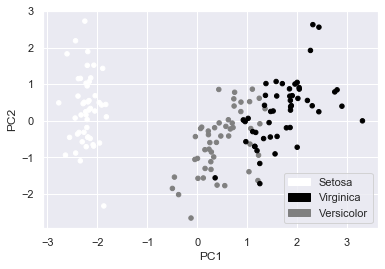

In [5]:
import matplotlib.patches as mpatches

def color_function (row):
   if row['Class'] == 'setosa' :
      return 'white'
   if row['Class'] == 'virginica' :
      return 'black'
   if row['Class'] == 'versicolor' :
      return 'gray'
    
colors = df.apply (lambda row: color_function(row), axis=1)

pca = PCA(n_components=2)
X = pca.fit_transform(X)


fig, ax = plt.subplots();
principalDf = pd.DataFrame(data = X
             , columns = ['PC1', 'PC2']);
scatter = principalDf.plot.scatter(x='PC1', y='PC2', c=colors, ax=ax);
plt.xlabel("PC1")
plt.ylabel("PC2")

pop_a = mpatches.Patch(color='white', label='Setosa');
pop_b = mpatches.Patch(color='black', label='Virginica');
pop_c = mpatches.Patch(color='gray', label='Versicolor');
handles=[pop_a,pop_b, pop_c]
ax.legend(handles=handles);


df_iris_PCA = pd.DataFrame(data = X, columns = [ 'PC1' , 'PC2'] )
df_iris_PCA_class = pd.concat( [ df_iris_PCA , Y ] , axis = 1 )
df_iris_PCA

### 5

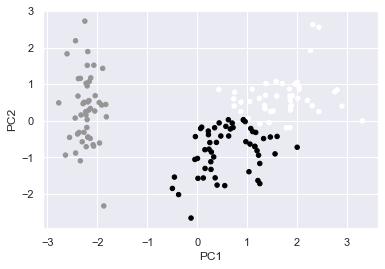

In [6]:
kmeans = KMeans(n_clusters =3, n_init=5, max_iter =300).fit(df_iris_PCA)
kmeans.score(df_iris_PCA)
prediction = kmeans.predict(df_iris_PCA)

df_iris_PCA.plot.scatter(x='PC1', y='PC2', c=prediction)

n_clusters spécifie le nombre de clusters voulus. 
n_init spécifie le nombre de fois que l'algorithme va être lancé avec une valeur d'initialisation des centroïdes différente.
max_iter définie le nombre maximum d'itération de l'algorithme pour chaque lancement.

### 6-7-8

Matrice de confusion 0. : 
 [[ 0 50  0]
 [39  0 11]
 [16  0 34]] 
 Pourcentage de précision : 22.666666666666664
Matrice de confusion 1. : 
 [[50  0  0]
 [ 0 39 11]
 [ 0 16 34]] 
 Pourcentage de précision : 82.0
Matrice de confusion 2. : 
 [[ 0 50  0]
 [39  0 11]
 [14  0 36]] 
 Pourcentage de précision : 24.0
Matrice de confusion 3. : 
 [[ 0 50  0]
 [11  0 39]
 [36  0 14]] 
 Pourcentage de précision : 9.333333333333334
Matrice de confusion 4. : 
 [[ 0 50  0]
 [39  0 11]
 [14  0 36]] 
 Pourcentage de précision : 24.0
Matrice de confusion 5. : 
 [[ 0 50  0]
 [39  0 11]
 [16  0 34]] 
 Pourcentage de précision : 22.666666666666664
Matrice de confusion 6. : 
 [[49  0  1]
 [ 0 13 37]
 [ 0 42  8]] 
 Pourcentage de précision : 46.666666666666664
Matrice de confusion 7. : 
 [[ 0 50  0]
 [11  0 39]
 [34  0 16]] 
 Pourcentage de précision : 10.666666666666668
Matrice de confusion 8. : 
 [[ 0 50  0]
 [11  0 39]
 [36  0 14]] 
 Pourcentage de précision : 9.333333333333334
Matrice de confusion 9. : 


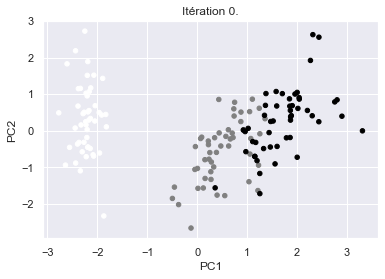

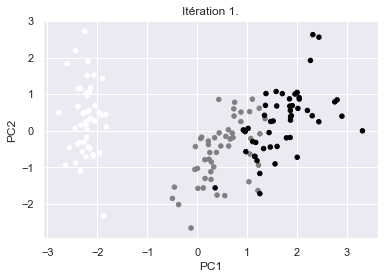

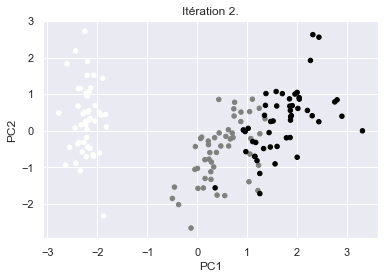

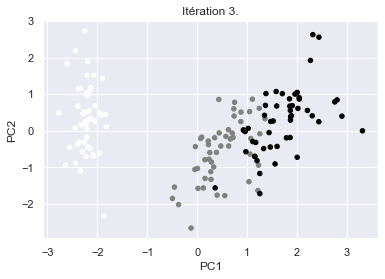

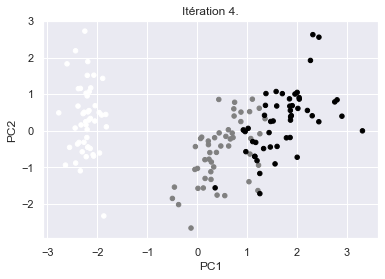

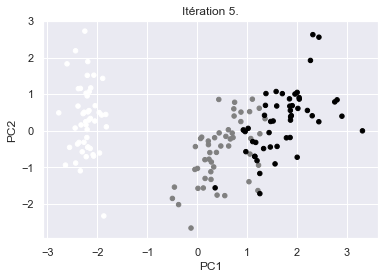

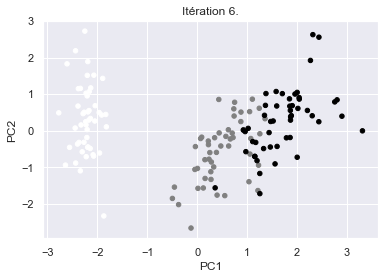

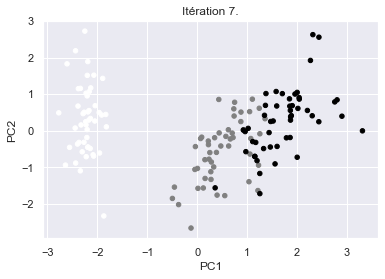

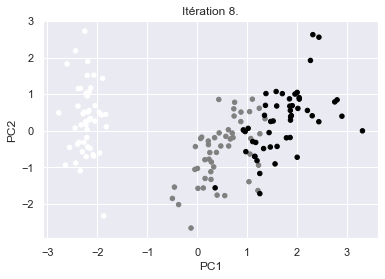

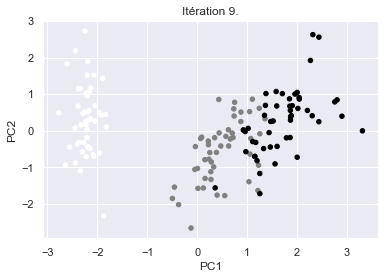

In [7]:
def transform_number(row):
    if row == 'setosa' :
        return 0
    if row == 'virginica' :
        return 2
    if row == 'versicolor' :
        return 1
    
lab_num = Y.apply (lambda row: transform_number(row))
liste_des_scores_de_precision = []
liste_des_matrices_de_confusion = []
liste_des_predictions = []
for it in range(10): 
    kmeans = KMeans(n_clusters =3, n_init=5, max_iter =300).fit(df_iris_PCA)
    kmeans.score(df_iris_PCA)
    prediction = kmeans.predict(df_iris_PCA)
    scatter = df_iris_PCA.plot.scatter(x='PC1', y='PC2', c=colors)
    plt.title("Itération {}.".format(it))
    liste_des_scores_de_precision.append(accuracy_score(lab_num,prediction) * 100)
    liste_des_matrices_de_confusion.append(confusion_matrix(lab_num,prediction))
    liste_des_predictions.append(prediction)
    print("Matrice de confusion {}. : \n".format(it), confusion_matrix(lab_num,prediction), "\n Pourcentage de précision :", accuracy_score(lab_num,prediction) * 100)

On constate que les résultats sont identiques à chaque fois. C'est en effet à cause du paramètre n_init qui lance l'algorithme K-means plusieurs fois afin d'avoir un résultat moyenné.

In [8]:
ind_precision_max = liste_des_scores_de_precision.index(max(liste_des_scores_de_precision))
print('La matrice de confusion sélectionnée est la matrice de confusion {}:'.format(ind_precision_max))
print(liste_des_matrices_de_confusion[ind_precision_max])

La matrice de confusion sélectionnée est la matrice de confusion 1:
[[50  0  0]
 [ 0 39 11]
 [ 0 16 34]]


On peut donc affirmer qu'il n'y a pas d'erreurs de prédiction sur Setosa mais qu'il y a des erreurs sur Virginica et Versicolor.

### 9

In [9]:
score = silhouette_score (df_iris_PCA, liste_des_predictions[ind_precision_max], metric='euclidean')
print(score)

0.5104464148144476


Le coefficient de silhouette indique la moyenne du coefficient de silhouette pour tous les points. Le coefficient pour chaque point étant donc en moyenne 0.59, cela indique que les points sont relativement plus proche de son cluster que du cluster voisin. Cette valeur est haute pour les points de Setosa mais pas pour les points de Virginica et Versicolor (car les clusters sont en contact).

### 10

Il sont identiques mais les groupes peuvent parfois ne pas être à la même place. 

### 11

Matrice de confusion 0. : 
 [[ 0  0 50]
 [38 12  0]
 [11 39  0]] 
 Pourcentage de précision : 8.0
Matrice de confusion 1. : 
 [[ 0 50  0]
 [39  0 11]
 [16  0 34]] 
 Pourcentage de précision : 22.666666666666664
Matrice de confusion 2. : 
 [[ 0 50  0]
 [39  0 11]
 [16  0 34]] 
 Pourcentage de précision : 22.666666666666664
Matrice de confusion 3. : 
 [[ 0  0 50]
 [39 11  0]
 [16 34  0]] 
 Pourcentage de précision : 7.333333333333333
Matrice de confusion 4. : 
 [[ 0 50  0]
 [11  0 39]
 [34  0 16]] 
 Pourcentage de précision : 10.666666666666668
Matrice de confusion 5. : 
 [[ 0 50  0]
 [11  0 39]
 [36  0 14]] 
 Pourcentage de précision : 9.333333333333334
Matrice de confusion 6. : 
 [[ 0 49  1]
 [13  0 37]
 [42  0  8]] 
 Pourcentage de précision : 5.333333333333334
Matrice de confusion 7. : 
 [[ 0 50  0]
 [39  0 11]
 [14  0 36]] 
 Pourcentage de précision : 24.0
Matrice de confusion 8. : 
 [[ 0 50  0]
 [11  0 39]
 [34  0 16]] 
 Pourcentage de précision : 10.666666666666668
Matrice de conf

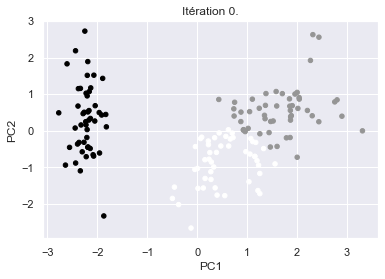

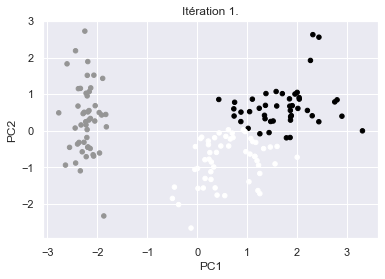

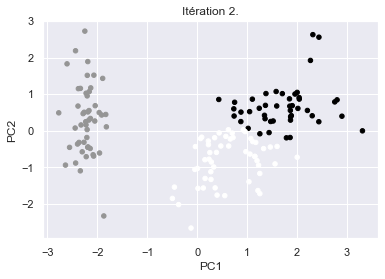

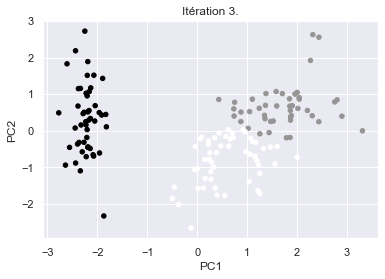

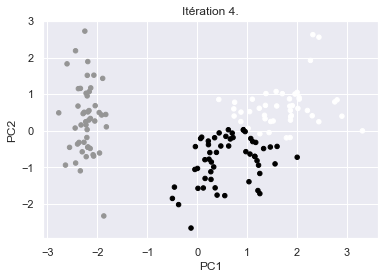

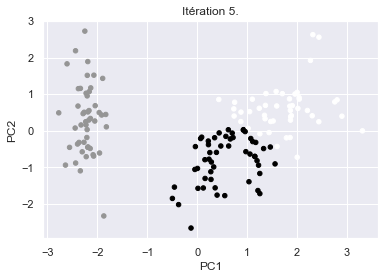

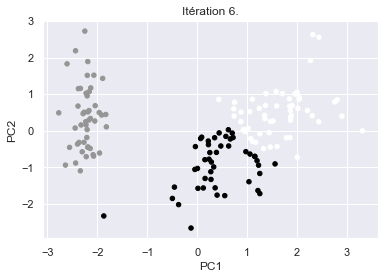

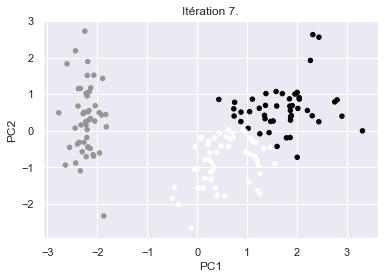

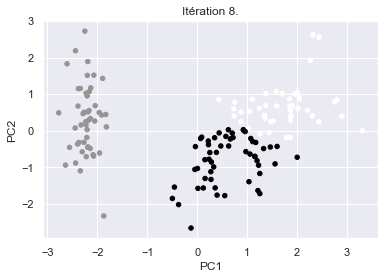

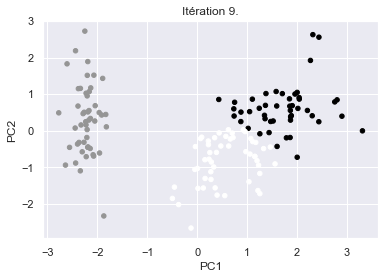

In [10]:
def transform_number(row):
    if row == 'setosa' :
        return 0
    if row == 'virginica' :
        return 2
    if row == 'versicolor' :
        return 1
    
lab_num = Y.apply (lambda row: transform_number(row))
liste_des_scores_de_precision_11 = []
liste_des_matrices_de_confusion_11 = []
liste_des_predictions_11 = []
for it in range(10): 
    kmeans = KMeans(n_clusters =3, n_init=5, max_iter =300).fit(X)
    kmeans.score(X)
    prediction = kmeans.predict(X)
    scatter = df_iris_PCA.plot.scatter(x='PC1', y='PC2', color=prediction)
    plt.title("Itération {}.".format(it))
    liste_des_scores_de_precision_11.append(accuracy_score(lab_num,prediction) * 100)
    liste_des_matrices_de_confusion_11.append(confusion_matrix(lab_num,prediction))
    liste_des_predictions_11.append(prediction)
    print("Matrice de confusion {}. : \n".format(it), confusion_matrix(lab_num,prediction), "\n Pourcentage de précision :", accuracy_score(lab_num,prediction) * 100)

In [11]:
ind_precision_max_11 = liste_des_scores_de_precision_11.index(max(liste_des_scores_de_precision_11))
print('La matrice de confusion sélectionnée est la matrice de confusion {}:'.format(ind_precision_max_11))
print(liste_des_matrices_de_confusion_11[ind_precision_max_11])

La matrice de confusion sélectionnée est la matrice de confusion 7:
[[ 0 50  0]
 [39  0 11]
 [14  0 36]]


In [12]:
score_11 = silhouette_score (X, liste_des_predictions_11[ind_precision_max_11], metric='euclidean')
print(score)

0.5104464148144476


Il n'y a quasiment pas de différences. Utiliser la PCA fait perdre de l'information mais elle permet de réduire le nombre de variables et donc le nombre de données à traiter. La prédiction est donc plus rapide à générer. Ceci à de l'intéret pour les grands jeux de données.

## B Hierarchical clustering

In [13]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from scipy.cluster.hierarchy import cophenet,inconsistent,maxRstat
from scipy.spatial.distance import pdist
import numpy as np

### 1

Text(0.5, 1.0, ' Multivariate gaussian scatter plot ')

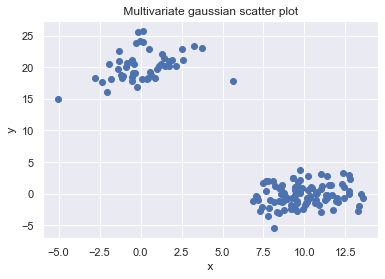

In [14]:
rng = np.random.RandomState(42)
a = rng.multivariate_normal( [ 10 , 0] , [ [ 3 , 1 ] , [ 1 , 4 ] ] , size = [ 100 , ])
b = rng.multivariate_normal( [ 0 , 20 ] , [ [ 3 , 1 ] , [ 1 , 4 ] ] , size = [ 50 , ])
X = np.concatenate( ( a , b ) , )

fig , ax = plt.subplots()
plt.scatter(X [ : , 0 ] , X [ : , 1 ] )
ax.set_xlabel( ' x ' , fontsize = 12)
ax.set_ylabel( ' y ' , fontsize = 12)
ax.set_title( ' Multivariate gaussian scatter plot ' , fontsize = 12)

Comme la distribution normale, la multivariate normal distribution fait est défini par un set de paramètres. Le premier paramètre de la fonction multivariate_normal est la coordonnée de la moyenne du jeu de données multivariés généré, par exemple [10, 0] va générer un cluster centré autour des coordonées (10, 0). Le second paramètre est la matrice de covariance du jeu de données généré.

### 2

In [ ]:
methods = ['single','complete','average','ward']

for method in methods:
    Z = linkage(X, method , optimal_ordering=True )

    c,_ = cophenet(Z , pdist(X));
    print ( ' Cophenetic correlation distance : {0} ' . format (c) )
    
    fig , ax = plt . subplots ( figsize =(25, 10) )
    dendrogram ( Z , leaf_rotation =90. , leaf_font_size = 8. , )
    fig . suptitle ( ' Full dendrogram ({0} method) ' . format (method) ,fontsize =25)
    ax . set_xlabel ( 'Sample clusters ' , fontsize =20) 
    ax . set_ylabel ( ' Distance ' , fontsize =20 )

 Cophenetic correlation distance : 0.9805688901951536 
 Cophenetic correlation distance : 0.9757996965953531 
 Cophenetic correlation distance : 0.9822665020438982 
 Cophenetic correlation distance : 0.9804692415551884 


Après avoir essayé les différents linkage tels que Ward, Average, Single et Complete, on constate que la séparation entre les deux clusters est toujours bien définie. En effet les proportions correspondent aux deux clusters que nous avons générés (100 et 50). Cependant, la distance entre les deux clusters (A et B) est plus marquée avec le linkage Ward que les autres.
Les autres méthodes sont étudiées durant la question finale 7.

### 3

In [ ]:
Z

La matrice Z(i,j) retournée contient i itérations de combinement de clusters. on a Z(i, 2) qui contient la distance entre Z(i, 0) et Z(i, 1) et Z(i, 3) qui contient le nombre de données oberservées dans le nouveau cluster formé.

### 4

Le coefficient cophénétique est le coefficient de corrélation entre la matrice de distance et la matrice cophénétique. La matrice cophénétique est une matrice triangulaire inférieure qui contient les distance entre les différents clusters. Le coefficient cophénétique permet donc de mesurer à quel point le dendrogramme préserve les distances deux à deux entre les clusters. Il peut donc être considéré comme un critère de qualité de l'ajustement du modèle face aux données.

### 5

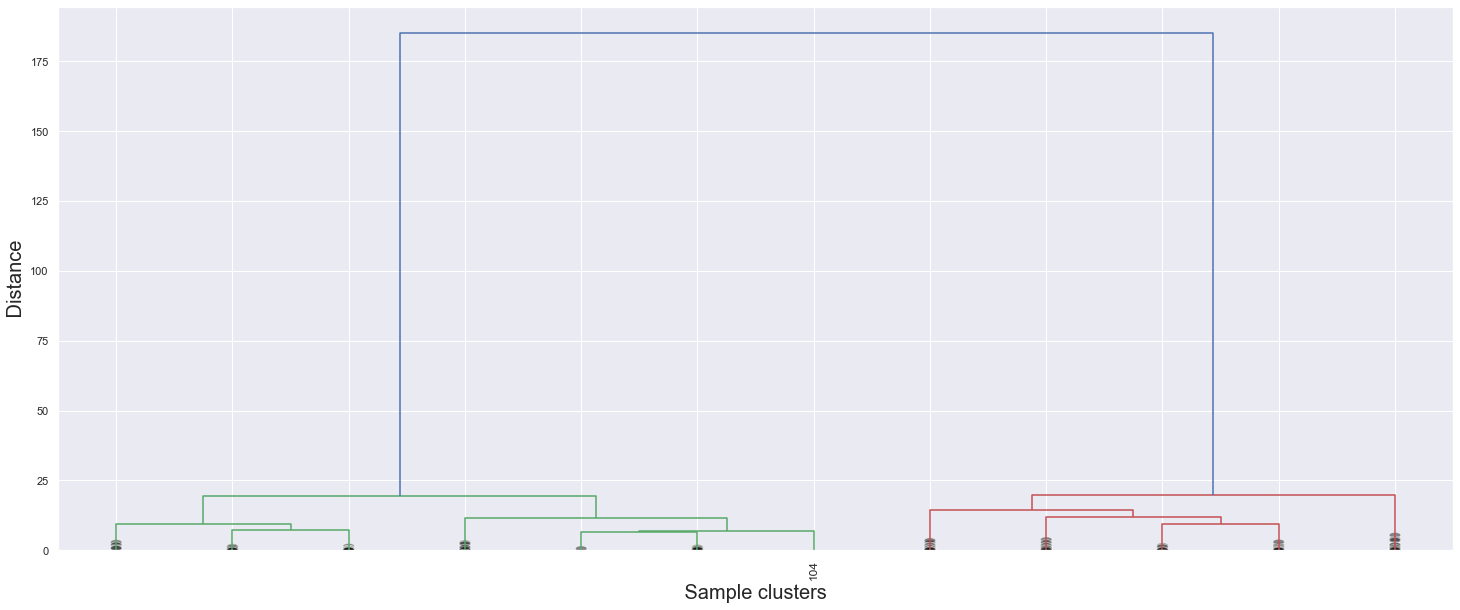

In [99]:
#display truncated dendrogram
fig , ax = plt.subplots ( figsize = ( 25 , 10 ) )
dendrogram (Z ,
truncate_mode='lastp',
p=12,
show_leaf_counts=False ,
leaf_rotation =90.,
leaf_font_size =12. ,
show_contracted=True ,)
ax.set_xlabel ( ' Sample clusters ' , fontsize = 20) ;
ax.set_ylabel ( ' Distance ' , fontsize = 20) ;

Le paramètre truncate_mode permet comme son nom l'indique de tronquer le dendrograme. Avec le mode "lastp", il contracte les premiers noeuds et n'affiche que ceux allant de n-p-2 au dernier.
Le paramètre p permet donc de jouer sur le nombre de noeuds affichés.

### 6

Text(0.5, 1.0, ' Classification using the first method ')

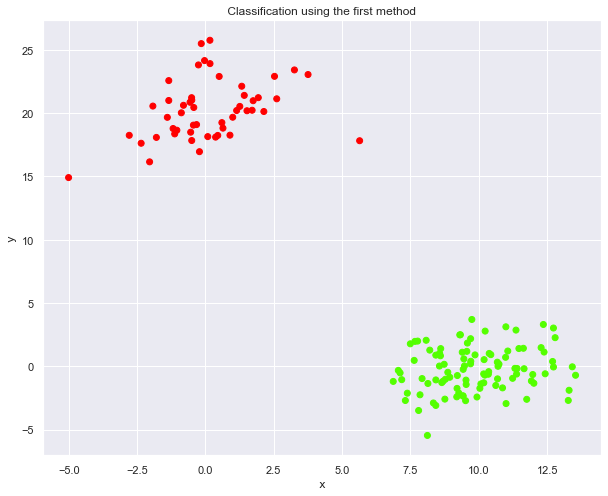

In [100]:
#First method
clusters = fcluster (Z , 20 , criterion = 'distance' )

fig , ax = plt.subplots ( figsize = ( 10 , 8 ) )
ax.scatter (X[:,0], X[:,1] , c=clusters , cmap='prism' ) ;
ax.set_xlabel ( ' x ' , fontsize = 12)
ax.set_ylabel ( ' y ' , fontsize = 12)
ax.set_title ( ' Classification using the first method ' , fontsize = 12) 

Text(0.5, 1.0, ' Classification using the second method ')

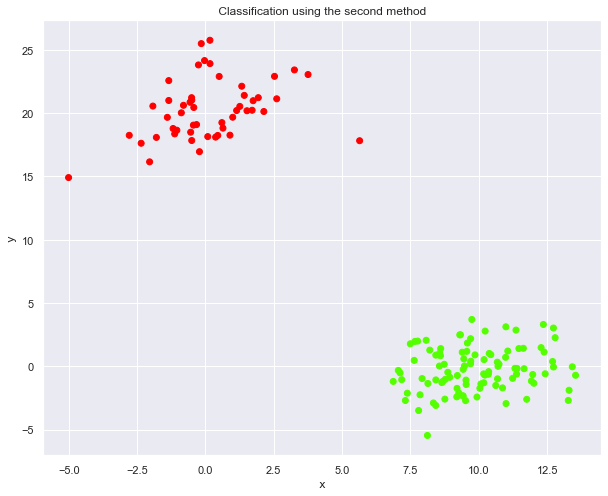

In [101]:
#Second method
clusters = fcluster (Z , 2 , criterion = 'maxclust' )

fig , ax = plt.subplots ( figsize = ( 10 , 8 ) )
ax.scatter (X[:,0], X[:,1] , c=clusters , cmap='prism' ) ;
ax.set_xlabel ( ' x ' , fontsize = 12)
ax.set_ylabel ( ' y ' , fontsize = 12)
ax.set_title ( ' Classification using the second method ' , fontsize = 12) 

La différence entre ces deux codes est le critère permettant de "couper" l'arbre pour obtenir le nombre de clusters voulus. L'un utilise distance et l'autre maxclust comme critère.
En faisant varier le paramètre max_d du critère distance on obtient un nombre de clusters différents. En effet, ce critère impose que chaque observation dans chaque cluster n'a pas une distance de cophénétique supérieure à max_d.
Le deuxième critère maxclust cherche à déterminer un paramètre r tel que la distance de cophénétique entre deux observations dans un cluster n'est pas supérieure à r et qu'il n'y a pas plus de k clusters formés. Modifier le paramètre k fait également varier le nombre de clusters.
Un des avantages du critère maxclust est que l'on impose un nombre maximum de clusters crontrèrement au critère distance. Le critère distance est également moins sensible aux outlers que le critère maxclust.

## C Optimal cluster number in the exoplanet dataset

### 1

In [103]:
df = pd.read_csv('exo4_atm_extr.csv',sep=';',header=0)
df = df[df.columns[0:11]]
df.head(5)

,PH2O,PHe,PCH4,PH2,PN2,PNH3,PO2,PAr,PCO2,PSO2,PK
0,0.0,8.7,1.3,87.30,0.0,2.70,0.0,0.0,0.0,0.0,0.00
1,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.02
2,0.1,7.1,1.7,86.45,0.0,1.15,0.0,0.0,0.0,3.5,0.00
3,0.0,2.7,0.0,3.70,41.5,0.00,31.3,6.6,14.2,0.0,0.00
4,0.1,11.4,1.1,86.10,0.0,0.20,0.0,0.0,0.0,1.1,0.00


### 2

L'indice de Calinksi-Harabasz est non normalisé, les clusters sont de meilleures qualités plus le nombre de l'indexe est grand. C'est aussi un bon critère pour déterminer le nombre de clusters lorsque ceux-ci sont de taille équilibrée. 
L'indice de Davies-Boouldin est non normalisé. Plus la valeur de l'indice est faible plus la séparation des données est bonne. Il favorise les clusters sphériques et il est indique des valeurs plus faibles pour les cluster de tailles petites ce qui biaise le résultat.

### 3

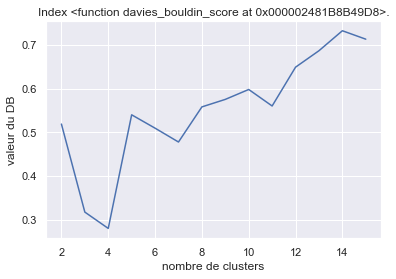

C:\Users\TLC10\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
C:\Users\TLC10\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
C:\Users\TLC10\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
C:\Users\TLC10\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function 

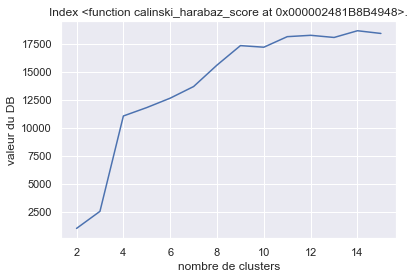

In [113]:
from sklearn.metrics import davies_bouldin_score, calinski_harabaz_score
X = df[ df.columns[:]]
nbcluster = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
y = []
indexs = [davies_bouldin_score, calinski_harabaz_score]
for index in indexs :
    y[:]=[]
    for n in nbcluster : 
        k_means = KMeans(n_clusters = n).fit(X)
        labels = k_means.labels_
        y.append(index(df[ df.columns[:]],labels))
    plt.plot(nbcluster,y)
    plt.xlabel('nombre de clusters')
    plt.ylabel('valeur du DB')
    plt.title('Index {}.'.format(index))
    plt.show()

Davies-Bouldin: On observe une rupture pour nombre de clusters = 4 
Calinski-Harabasz : On observe également une rupture de la courbe pour nombre de clusters = 4 
Ainsi le nombre optimal de clusters pour le K-means algorithme est 4.

### 4

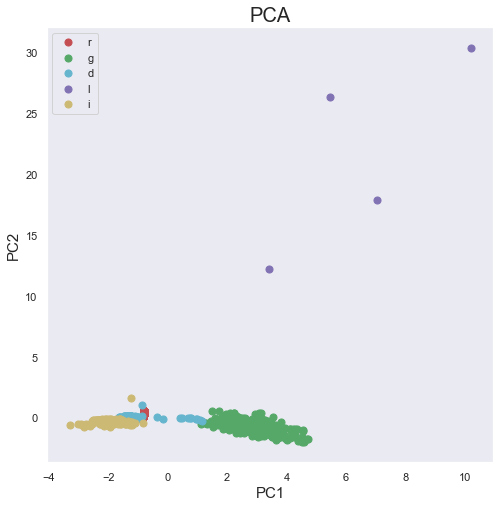

In [117]:
df = pd.read_csv('exo4_atm_extr.csv',sep=';',header=0)

scaler = StandardScaler()
subset = df[df.columns[0:11]]
fitted = scaler.fit_transform(subset)
df[df.columns[0:11]] = fitted

pca = PCA()
kmeans = KMeans(n_clusters=4, n_init=5, max_iter =300).fit(X)
X = pca.fit_transform(df[df.columns[0:11]])
principalDf = pd.DataFrame(data = X[:,0:2],columns = ['PC1','PC2'])
finalDf = pd.concat([principalDf,df[df.columns[11]]],axis=1)
finalDf.columns = ['PC1', 'PC2', 'Type']
types = ['r','g','d','l','i']
colors = ['r','g','c','m','y']
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('PCA', fontsize = 20)

for type,color in zip(types,colors):
    indicesToKeep = finalDf['Type'] == type
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(types)
ax.grid()

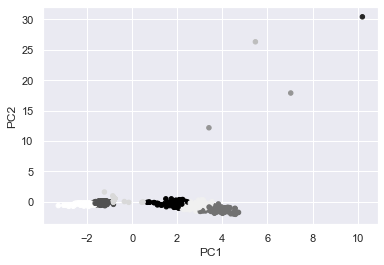

In [118]:
kmeans = KMeans(n_clusters=4, n_init=5, max_iter =300).fit(principalDf)
kmeans.score(principalDf)
prediction = kmeans.predict(principalDf)
principalDf.plot.scatter(x='PC1', y='PC2', color=prediction)

On observe le résultat du clustering avec K_means et 4 clusters. On remarque que le type l a été séparé en 2 clusters différents; les types g et d sont mélangés dans le même cluster; les types r, i sont mélangés et contiennent une partie de d dans leur cluster. Les résultats ne sont donc pas optimaux car 1 cluster a été dans un cluster plus grand, un autre a été séparé dans 2 clusters et 1 cluster. On aurait pu augmenter le nombre de clusters.